In [119]:
import torch

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
  model.to("cpu")
  X, y = X.to("cpu"), y.to("cpu")

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

  X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

  model.eval()
  with torch.inference_mode():
      y_logits = model(X_to_pred_on)

  if len(torch.unique(y)) > 2:
      y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
  else:
      y_pred = torch.round(torch.sigmoid(y_logits))          # binary

  y_pred = y_pred.reshape(xx.shape).detach().numpy()
  plt.contourf(xx, yy, y_pred, alpha=0.25, cmap=plt.cm.viridis)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.viridis)
  plt.xlim(xx.min(), xx.max())
  plt.xlabel('Feature 1')
  plt.ylim(yy.min(), yy.max())
  plt.ylabel('Feature 2')

# **Binary Classification Problem**


- A [classification problem](https://en.wikipedia.org/wiki/Statistical_classification) involves predicting one of two options.

    -  **Binary classification**:
        - Choosing **only one of two options**.
        - Whether someone has heart disease or not.
    - **Multi-class classification**:
        - Choosing **only one of more than two options**.
        - Whether a photo is of cat, dog, chicken.
    - **Multi-label classification**:
        - Choosing **more than one option of two or more options**.
        - Categories of an article (e.g. mathematics, computer science or statistics).


# **1. Data Loading and Preparation**

- Let us generate some random data using the [`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) method from Scikit-Learn library.

- Let us generate two circles with different coloured dots.

In [120]:
from sklearn.datasets import make_circles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X, y = make_circles(n_samples = 1000, noise=0.03, random_state=42)
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [121]:
len(X), len(y)

(1000, 1000)

- It seems that there's two input features (`X`) values per one output (`y`) value.
- Let us put them into a `pandas` DataFrame.

In [122]:
circles_df = pd.DataFrame({"x1": X[:, 0], "x2": X[:, 1], "y": y})
circles_df

,x1,x2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


- Each pair of `X` features (`x1` and `x2`) has a label (`y`) value of either 0 or 1.
- Hence, the problem is **binary classification** since there are only two options (0 or 1).

- How many values of each class is there? Let us check the frequency of the two labels.

In [123]:
circles_df.y.value_counts()

y
1    500
0    500
Name: count, dtype: int64

- Each label has a frequency of 500. Balanced.

- Let us plot for ease of visualization.

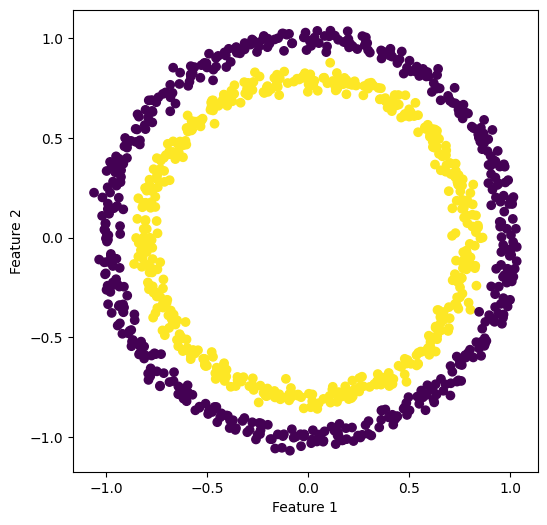

In [124]:
plt.figure(figsize=(6, 6))
plt.scatter(X[ : , 0], X[ : , 1], c = y, cmap=plt.cm.viridis)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

- Note that this dataset is often considered as a **toy problem**.
- In machine learning, a **toy problem** refers to a simplified and often contrived task or dataset that serves as a **learning exercise or illustration of a specific concept or algorithm**.
- Toy problems are designed to be **relatively simple** and **easy to understand**, allowing researchers and practitioners to **experiment**, **develop**, and **evaluate** new approaches, algorithms, or models without the complexity and constraints of real-world problems.


- As a result, the above data can represent the major key of classification.
- We would like to build an NN model which is able to classify in to the two different colors.

## **1.1. Turn Data into Tensors**

- Turn the NumPy arrays data into tensors which PyTorch prefers to work with.

In [125]:
import torch
from torch import nn

In [126]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [127]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X, y

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,


In [128]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

## **1.2. Input and Output Shapes**

- One of the most common errors in deep learning is **shape errors**.
- The mismatch of shapes in tensor operations will result in errors.
- So the first question is "**What shapes are the inputs and the outputs?**"

In [129]:
print(f"Input shape: {X.shape}, Output shape: {y.shape}")

Input shape: torch.Size([1000, 2]), Output shape: torch.Size([1000])


In [130]:
X

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        ...,
        [-0.1369, -0.8100],
        [ 0.6704, -0.7675],
        [ 0.2811,  0.9638]])

In [131]:
y

tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
        1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
        1., 0., 1., 1., 0., 1., 1., 0., 

- The first dimension of input and output shapes match.
- But what is the second dimension on `X`?

- It often helps to view the values and shapes of a single example (features and labels).
- So let us view the first example of features and labels.

In [132]:
X_example = X[0]
y_example = y[0]
print(f"Example 1 of X: {X_example} and corresponding example of y: {y_example}")
print(f"Shapes example of X: {X_example.shape} and corresponding example of y: {y_example.shape}")

Example 1 of X: tensor([0.7542, 0.2315]) and corresponding example of y: 1.0
Shapes example of X: torch.Size([2]) and corresponding example of y: torch.Size([])


- This means there are two features in `X` where as `y` has a single feature (**scalar** - which has **no shape** for a single example label).

## **1.3. Create Train and Test Splits**

- Now the data is in tensor format, let us split it into training and test sets.
- To do so, function [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from Scikit-Learn can be used.

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

- Let us reshape or unsqueeze the outcome variable

In [134]:
y_train, y_test = y_train.reshape(-1,1), y_test.reshape(-1,1)
y_train.shape, y_test.shape

(torch.Size([800, 1]), torch.Size([200, 1]))

- There are 800 training examples and 200 testing examples.

In [135]:
type(X_train), X_train.dtype, y_train.dtype

(torch.Tensor, torch.float32, torch.float32)

## **1.4. Set Up to Use GPU if available**

- Based on the following code, the model can run on GPU if available else on CPU by default.

In [136]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [137]:
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)
X_train.device, X_test.device, y_train.device, y_test.device

(device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'))

# **2. Building Model**

- It is time to build a model breaking it down into into a few parts:
    1. Create model by subclassing `nn.Module`.
    2. Define loss function and optimizer.
    3. Construct training loop.

- Given `X` (features), the model is expected to predict `y` (label), **supervised learning**.

- Let us create a model class subclassing `nn.Module`:
    1. Specify, say, 2 linear layers using `nn.Linear()`.
    2. Define a `forward()` method for the forward pass computation of the model.

In [138]:
class BinaryClassModelV1(nn.Module):
  def __init__(self, n_inputs, h_units, n_outputs):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = n_inputs, out_features = h_units)
    self.layer_2 = nn.Linear(in_features = h_units, out_features = n_outputs)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

## **2.1. Instantiate Model and Move to the Target Device**

- Let us instantiate the model (create an instance of the model) and send it to the target `device`.

In [139]:
num_inputs = X_train.shape[1]
model_1 = BinaryClassModelV1(num_inputs, h_units=8, n_outputs=1).to(device)
model_1

BinaryClassModelV1(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
)

In [140]:
next(model_1.parameters()).device

device(type='cpu')

In [141]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6448,  0.4079],
                      [-0.4117, -0.0918],
                      [-0.5213, -0.3411],
                      [ 0.1281,  0.3850],
                      [ 0.5857, -0.6492],
                      [ 0.4728, -0.4987],
                      [ 0.2648,  0.5984],
                      [ 0.0099,  0.6433]])),
             ('layer_1.bias',
              tensor([-0.6025, -0.2701,  0.4124, -0.1541, -0.1447, -0.2947,  0.4874,  0.3468])),
             ('layer_2.weight',
              tensor([[ 0.1133, -0.1987, -0.2870,  0.0382,  0.1048, -0.1632, -0.0989,  0.2388]])),
             ('layer_2.bias', tensor([0.0282]))])

- Note the first layer has $2\times 5=10$ weight parameters (`layer_1.weight`) and 5 biases `layer_1.bias`.
- The second layer has $5$ weight parameters (`layer_1.weight`) and 5 biases `layer_1.bias`.

## **2.2. Predictions With Untrained Model**

- Now we have created a model, let us see what happens when we pass some data through it.
- Note to send the data to the target device.

In [142]:
untrained_preds = model_1(X_test)
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 1])

First 10 predictions:
tensor([[ 0.0502],
        [ 0.2345],
        [-0.3224],
        [ 0.1553],
        [-0.1465],
        [-0.0353],
        [ 0.3444],
        [ 0.2817],
        [-0.3292],
        [ 0.2488]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.]])


- In the `.inference_mode()`, the gradient in the predictions goes away.

In [143]:
with torch.inference_mode():
  untrained_preds = model_1(X_test)

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[ 0.0502],
        [ 0.2345],
        [-0.3224],
        [ 0.1553],
        [-0.1465],
        [-0.0353],
        [ 0.3444],
        [ 0.2817],
        [-0.3292],
        [ 0.2488]])

First 10 test labels:
tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.]])


- Note that here the predictions are continuous values whereas the labels are discrete (particularly, 0 or 1).

- What?.

### **2.2.1. Predicted Output Values To Probabilities: Sigmoid Function**

- Implementation of two linear layers of `nn.Linear()` internally calls the following equation:
$\mathbf{y} = \mathbf{x}\mathbf{W}^T  + \mathbf{b}$.

- The predicted raw values (outputs) of this equation ($\hat{\mathbf{y}}$) can be interpreted as [logits](https://datascience.stackexchange.com/a/31045) which are a function of probabilities.
- This means that the logits can be converted to probabilites using a transformation called [sigmoid](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) activation function.

- Let us try it out.

In [144]:
with torch.inference_mode():
  y_pred_logits = model_1(X_test)

y_pred_probs = torch.sigmoid(y_pred_logits)

y_pred_logits[:10], y_pred_probs[:10]

(tensor([[ 0.0502],
         [ 0.2345],
         [-0.3224],
         [ 0.1553],
         [-0.1465],
         [-0.0353],
         [ 0.3444],
         [ 0.2817],
         [-0.3292],
         [ 0.2488]]),
 tensor([[0.5125],
         [0.5584],
         [0.4201],
         [0.5387],
         [0.4634],
         [0.4912],
         [0.5853],
         [0.5700],
         [0.4184],
         [0.5619]]))

### **2.2.2. Predicted Probabilities To Labels: Dichotomization**

- The predicted values are now in the form of **prediction probabilities** ([0,1]).
- As a binary classification, the ideal outputs are 0 or 1 that can be viewed as a decision boundary.
    - The closer to 0, the more the model thinks the sample belongs to class 0.
    - The closer to 1, the more the model thinks the sample belongs to class 1.

- More specificially:
    * If `y_pred_probs` >= 0.5, `y = 1` (class 1)
    * If `y_pred_probs` < 0.5, `y = 0` (class 0)

In [145]:
y_preds = torch.round(y_pred_probs)
y_preds[:10]

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]])

- We have converted the model's predicted raw outputs (logits) to probabilities using a **sigmoid activation function**.
- This is only for binary classification problems.
- For multi-class classification, there is another activation function called [softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html).

- We can write the conversion from **raw output values->probabilities->labels** in a single line as:

In [146]:
with torch.inference_mode():
  y_pred_labels = torch.round(torch.sigmoid(model_1(X_test)))

y_pred_labels[:10]

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.]])

**Note**:
- The predicted raw output values (or probabilities or labels) are all of shape of `[200, 1]`.
- Hence, **squeezing** is required to get rid of the extra dimension and use them for further computations.

 - The function `torch.eq()` checks whether each of the corresponding values are equal.

In [147]:
# print(torch.eq(y_preds, y_pred_labels)==False)

In [148]:
torch.any(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze())==False)

tensor(False)

- Now it looks like the model's predictions are in the same form as the truth labels (`y_test`).

In [149]:
y_test[:10]

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.]])

In [150]:
y_test.shape, y_pred_probs.shape, y_pred_probs.shape, y_preds.shape

(torch.Size([200, 1]),
 torch.Size([200, 1]),
 torch.Size([200, 1]),
 torch.Size([200, 1]))

In [151]:
y_test.shape, y_pred_probs.squeeze(dim=1).shape, y_pred_probs.squeeze(dim=1).shape, y_preds.squeeze(dim=1).shape

(torch.Size([200, 1]), torch.Size([200]), torch.Size([200]), torch.Size([200]))

## **2.3. Loss Function and Optimizer**

- Recall a **loss function** is what measures **how wrong the model predictions are**; the higher the loss, the worse the model.
- For a binary classification problem, [binary cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) loss function is used.
- There are two **binary cross entropy** implementations:
    1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) - a loss function measuring the binary cross entropy between the target and input (features) probabilities.
    2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - Same as above but has a sigmoid layer ([`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)) which makes more numerically stable.


- Stochastic gradient descent (SGD, `torch.optim.SGD()`) or Adam (`torch.optim.Adam()`) optimizers can be used for a range of problems.

- Having the above concepts in mind, let us create a loss function and an optimizer.
- We will use use a binary cross entropy loss function.
- And for the optimizer, we'll use `torch.optim.SGD()` to optimize the model parameters with learning rate 0.1.

In [152]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

- Note that the sigmoid activation function is used to make the predicted outputs same format as the true labels.
- However, sigmoid activation function is not required when passing the model's raw outputs to the `nn.BCEWithLogitsLoss`.
- Because it has already a built-in sigmoid function.

## **2.4. Evaluation Metrics**



- As a **loss** function measures **how wrong the model is**, an **evaluation metric** can be think of measuring **how right the model is**.
- Though both seem the same, **evaluation metrics** can be used to offer a different perspective on how the model is going.

- Of the several evaluation metrics to be used for classification problems, let us consider **accuracy** (\% of correct predictions) here.

- Let us write a function to do so.



In [153]:
def accuracy_metric(y_true, y_pred):
  # appropriate for balanced classes
  correct_preds = torch.eq(y_true, y_pred).sum().item()
  return (correct_preds / len(y_pred)) * 100

**More Classification Evaluation Metrics**

- Scikit-Learn has many implementations of classification metrics.


| **Metric** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Proportion of correct predictions; $P(\hat{y}=1|y=1)+P(\hat{y}=0|y=0)$ . | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) |
| Precision | Proportion of TPs over total number of samples; $P(\hat{y}=1|y=0)$. | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) |
| Recall | Proportion of TPs over total number of TPs and FNs. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) |
| F1-score | Combines precision and recall into one. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted and true values in a tabular way. | [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) |




## **2.5.  Training and Testing**

<details>
    <summary>Training loop steps</summary>
    <ol>
        <li><b>Forward pass</b> - <code>model(x_train)</code>.
        </li>
        <li><b>Loss calculation</b> - <code>loss = criterion(y_pred, y_train)</code>.</li>
        <li><b>Zero gradients</b> - <code>optimizer.zero_grad()</code>.</li>
        <li><b>Backward pass</b> - <code>loss.backward()</code>.</li>
        <li><b>Step optimizer (gradient descent)</b> - <code>optimizer.step()</code>.</li>
    </ol>
</details>



In [154]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_1 = BinaryClassModelV1(num_inputs, h_units=8, n_outputs=1).to(device)
# criterion = nn.BCELoss()            # Requires sigmoid on input
criterion = nn.BCEWithLogitsLoss()    # Not require sigmoid on input
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [155]:
epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(1, epochs + 1):
                                              # 1. Forward pass (model outputs raw logits)
  y_logits = model_1(X_train)
  y_pred_probs = torch.sigmoid(y_logits)      # <- turn logits to pred probs
  y_pred = torch.round(y_pred_probs)          # <- turn pred probs to pred labels
                                              # 2. Calculate loss and (or accuracy)
  # loss = criterion(y_pred_probs, y_train)   # <- `criterion = nn.BCELoss` -> pred probabilities as inputs
  loss = criterion(y_logits, y_train)         # <- `criterion = nn.BCEWithLogitsLoss` -> pred logits as inputs
  accuracy = accuracy_metric(y_true = y_train, y_pred = y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test)
    test_pred_probs = torch.sigmoid(test_logits)            # <- turn logits to pred probs
    test_pred = torch.round(test_pred_probs)                # <- turn pred probs to pred labels

    # test_loss = criterion(test_pred_probs, y_test)        # <- If `criterion = nn.BCELoss`
    test_loss = criterion(test_logits, y_test)              # <- If `criterion = nn.BCEWithLogitsLoss`
    test_acc = accuracy_metric(y_true = y_test, y_pred = test_pred)

  if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss (train, test): ({loss:.5f}, {test_loss:.5f})| Accuracy (train, test): ({accuracy:.2f}%, {test_acc:.2f}%).")

Epoch: 10 | Loss (train, test): (0.70120, 0.69189)| Accuracy (train, test): (48.50%, 53.00%).
Epoch: 20 | Loss (train, test): (0.69866, 0.69088)| Accuracy (train, test): (48.50%, 54.50%).
Epoch: 30 | Loss (train, test): (0.69710, 0.69061)| Accuracy (train, test): (48.75%, 54.00%).
Epoch: 40 | Loss (train, test): (0.69604, 0.69064)| Accuracy (train, test): (49.00%, 54.00%).
Epoch: 50 | Loss (train, test): (0.69528, 0.69082)| Accuracy (train, test): (49.00%, 54.00%).
Epoch: 60 | Loss (train, test): (0.69471, 0.69106)| Accuracy (train, test): (48.88%, 53.00%).
Epoch: 70 | Loss (train, test): (0.69429, 0.69134)| Accuracy (train, test): (49.12%, 53.50%).
Epoch: 80 | Loss (train, test): (0.69397, 0.69162)| Accuracy (train, test): (49.25%, 54.00%).
Epoch: 90 | Loss (train, test): (0.69373, 0.69191)| Accuracy (train, test): (49.75%, 54.50%).
Epoch: 100 | Loss (train, test): (0.69355, 0.69218)| Accuracy (train, test): (49.62%, 54.50%).


- Noticing the performance of the model, the results do not seem to have moved too much.
- Both the training and testing accuracy values barely moves above 50%.
- As good as random guessing (a model predicting class 1 every single time would achieve 50% accuracy).

# **3. Model Improvement**

- **Visualization of Predictions**

    - To better understand why it looks like random guessing, let us make a visualization plot of the model's predictions.
    - That is, let us see the decision boundary over the data to predict on.
    - To do so, using a helper function, the decision boundary plots for the training and test sets can be obtained running following code.

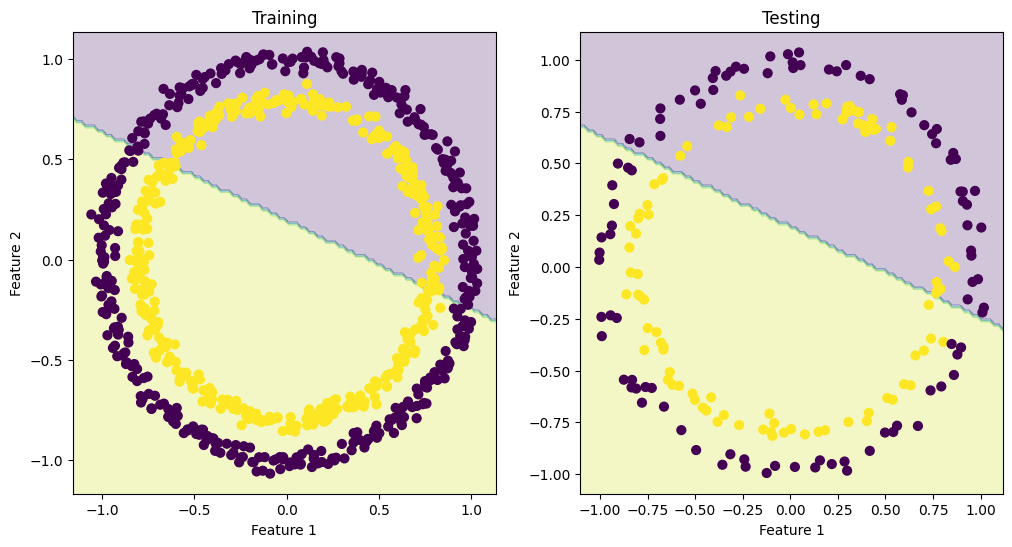

In [156]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Testing")
plot_decision_boundary(model_1, X_test, y_test)

- The cause of model's low performance is the **linear decision boundary** that is trying to split the red and blue dots.
- Since the data is circular, drawing a straight line can at best cut it down the middle.
- In such cases, the model is **underfitting**, meaning it is **not learning predictive patterns** from the data.

- How could the performance be improved?  Changing **hyperparameters**.

- Some ways of improving the model (not the data) are:

| Technique | What does it do? |
| ----- | ----- |
| **Adding layers** | Each layer **potentially** increases learning capabilities, more layers is often referred to as **deeper** NN. |
| **More hidden units** | More hidden units per layer (i.e., **wider** layer) means a **potential** increase in learning capabilities. |
| **Longer training period** | The model might learn more if it had more opportunities to look at the data. |
| **Activation functions** | Linear function will not fit to most data, using non-linear activation functions can help with this. |
| **Learning rate** | Too large leads the model to diverge, too small may take longer time for the model to learn enough. |
| **Loss function** | Different problems require different loss functions. |
| **Transfer learning** | Take a pretrained model of a similar problem domain and adjust it to own problem.

## **3.1. Adding More Layers and Nodes**

- Let's see what happens if we add an extra layer to our model, fit for longer (`epochs=1000` instead of `epochs=100`) and increase the number of hidden units from `5` to `10`.

- Follow the same steps we did above but with a few changed hyperparameters.

In [157]:
class BinaryClassModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features = 16)
        self.layer_2 = nn.Linear(in_features = 16, out_features = 16) # extra layer
        self.layer_3 = nn.Linear(in_features = 16, out_features = 1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_2 = BinaryClassModelV2().to(device)
model_2

BinaryClassModelV2(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=16, bias=True)
  (layer_3): Linear(in_features=16, out_features=1, bias=True)
)

In [158]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5233,  0.5476],
                      [-0.1752,  0.6278],
                      [-0.1644,  0.1212],
                      [-0.3616,  0.3759],
                      [ 0.6234, -0.5186],
                      [ 0.5851,  0.0652],
                      [ 0.5557,  0.1716],
                      [ 0.3136, -0.1621]])),
             ('layer_1.bias',
              tensor([ 0.5404,  0.1016, -0.3313,  0.1775, -0.3249, -0.0874, -0.2847,  0.4659])),
             ('layer_2.weight',
              tensor([[-0.1012, -0.0407, -0.0899, -0.1590, -0.0226, -0.2721,  0.3959, -0.2926]])),
             ('layer_2.bias', tensor([0.2833]))])

- Now we have a model with an extra layer and increased hidden nodes.
- Using similar loss function and optimizer as before, but with(`epochs=1000` vs `epochs=100`) training period, let us see if the model performance improves.

In [159]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = BinaryClassModelV2().to(device)
# criterion = nn.BCELoss()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(1, epochs + 1):

  y_logits = model_2(X_train)
  y_pred_probs = torch.sigmoid(y_logits)      # <- turn logits to pred probs
  y_pred = torch.round(y_pred_probs)          # <- turn pred probs to pred labels

  # loss = criterion(y_pred_probs, y_train)   # <- `criterion = nn.BCELoss` -> pred probabilities as inputs
  loss = criterion(y_logits, y_train)         # <- `criterion = nn.BCEWithLogitsLoss` -> pred logits as inputs
  accuracy = accuracy_metric(y_true = y_train, y_pred = y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test)
    test_pred_probs = torch.sigmoid(test_logits)            # <- turn logits to pred probs
    test_pred = torch.round(test_pred_probs)                # <- turn pred probs to pred labels

    # test_loss = criterion(test_pred_probs, y_test)        # <- If `criterion = nn.BCEWithLogitsLoss`
    test_loss = criterion(test_logits, y_test)              # <- If `criterion = nn.BCEWithLogitsLoss`
    test_acc = accuracy_metric(y_true = y_test, y_pred = test_pred)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss (train, test): ({loss:.5f}, {test_loss:.5f})| Accuracy (train, test): ({accuracy:.2f}%, {test_acc:.2f}%).")

Epoch: 100 | Loss (train, test): (0.69618, 0.69376)| Accuracy (train, test): (50.00%, 50.00%).
Epoch: 200 | Loss (train, test): (0.69618, 0.69376)| Accuracy (train, test): (50.00%, 50.00%).
Epoch: 300 | Loss (train, test): (0.69618, 0.69376)| Accuracy (train, test): (50.00%, 50.00%).
Epoch: 400 | Loss (train, test): (0.69618, 0.69376)| Accuracy (train, test): (50.00%, 50.00%).
Epoch: 500 | Loss (train, test): (0.69618, 0.69376)| Accuracy (train, test): (50.00%, 50.00%).
Epoch: 600 | Loss (train, test): (0.69618, 0.69376)| Accuracy (train, test): (50.00%, 50.00%).
Epoch: 700 | Loss (train, test): (0.69618, 0.69376)| Accuracy (train, test): (50.00%, 50.00%).
Epoch: 800 | Loss (train, test): (0.69618, 0.69376)| Accuracy (train, test): (50.00%, 50.00%).
Epoch: 900 | Loss (train, test): (0.69618, 0.69376)| Accuracy (train, test): (50.00%, 50.00%).
Epoch: 1000 | Loss (train, test): (0.69618, 0.69376)| Accuracy (train, test): (50.00%, 50.00%).


- The model is trained for longer and with an extra layer.
- But it still looks like it does not learn any patterns better than random guessing.

- Let us visualize again.

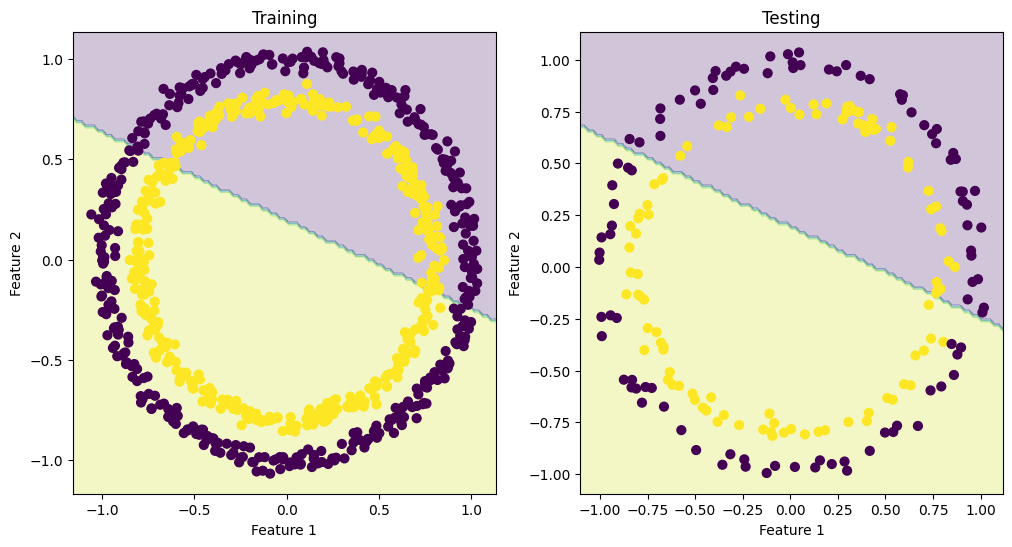

In [160]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Testing")
plot_decision_boundary(model_1, X_test, y_test)

- The model is still drawing a straight line between the red and blue dots.

## **3.2. Incorporating Activation Functions**

- The data we have been working with is **non-linear (circular)**.
 - [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) (rectified linear-unit, [`torch.nn.ReLU()`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)).

- Following code applies intersperse ReLU between the layers as shown in the `forward()` method.
- However, the output of the instantiated model does not let us know where the activation function is applied.



In [161]:
from torch import nn
class BinaryClassModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 8)
    self.layer_2 = nn.Linear(in_features = 8, out_features = 1)
    self.relu = nn.ReLU() # <- ReLU activation function

  def forward(self, x):
    return self.layer_2(self.relu(self.layer_1(x)))

model_3 = BinaryClassModelV3().to(device)
print(model_3)

BinaryClassModelV3(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)


In [162]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

In [163]:
torchinfo.summary(model_3, input_size = [2])

Layer (type:depth-idx)                   Output Shape              Param #
BinaryClassModelV3                       [1]                       --
├─Linear: 1-1                            [8]                       24
├─ReLU: 1-2                              [8]                       --
├─Linear: 1-3                            [1]                       9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

- We can also see the parameters:

In [164]:
model_2.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007]])),
             ('layer_1.bias',
              tensor([ 0.5459,  0.1177, -0.2296,  0.4370,  0.1102,  0.5713,  0.0773, -0.2230,
                       0.1900, -0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082,  0.1265])),
             ('layer_2.weight',
              tensor([[ 0.1270, -0.1524,

- Note that the activation function has no parameters.

- Now let us create a binary classification loss function (`nn.BCEWithLogitsLoss()`) as well as an optimizer (`torch.optim.SGD(model_3.parameters(), lr = 0.1)`), and then train.

In [165]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_3 = BinaryClassModelV3().to(device)
print(model_3)
# criterion = nn.BCELoss()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_3.parameters(), lr = 0.1)

BinaryClassModelV3(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)


In [166]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(1, epochs + 1):

  y_logits = model_3(X_train)
  y_pred_probs = torch.sigmoid(y_logits)      # <- turn logits to pred probs
  y_pred = torch.round(y_pred_probs)          # <- turn pred probs to pred labels

  # loss = criterion(y_pred_probs, y_train)   # <- `criterion = nn.BCELoss` -> pred probabilities as inputs
  loss = criterion(y_logits, y_train)         # <- `criterion = nn.BCEWithLogitsLoss` -> pred logits as inputs
  accuracy = accuracy_metric(y_true = y_train, y_pred = y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test)
    test_pred_probs = torch.sigmoid(test_logits)            # <- turn logits to pred probs
    test_pred = torch.round(test_pred_probs)                # <- turn pred probs to pred labels

    # test_loss = criterion(test_pred_probs, y_test)        # <- If `criterion = nn.BCEWithLogitsLoss`
    test_loss = criterion(test_logits, y_test)              # <- If `criterion = nn.BCEWithLogitsLoss`
    test_acc = accuracy_metric(y_true = y_test, y_pred = test_pred)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss (train, test): ({loss:.5f}, {test_loss:.5f})| Accuracy (train, test): ({accuracy:.2f}%, {test_acc:.2f}%).")

Epoch: 100 | Loss (train, test): (0.68820, 0.68391)| Accuracy (train, test): (51.25%, 56.00%).
Epoch: 200 | Loss (train, test): (0.68414, 0.68060)| Accuracy (train, test): (51.62%, 55.50%).
Epoch: 300 | Loss (train, test): (0.68018, 0.67689)| Accuracy (train, test): (52.25%, 55.50%).
Epoch: 400 | Loss (train, test): (0.67582, 0.67252)| Accuracy (train, test): (59.88%, 61.50%).
Epoch: 500 | Loss (train, test): (0.67088, 0.66782)| Accuracy (train, test): (65.75%, 70.50%).
Epoch: 600 | Loss (train, test): (0.66518, 0.66278)| Accuracy (train, test): (68.38%, 73.00%).
Epoch: 700 | Loss (train, test): (0.65657, 0.65488)| Accuracy (train, test): (69.38%, 72.00%).
Epoch: 800 | Loss (train, test): (0.64643, 0.64644)| Accuracy (train, test): (71.88%, 74.50%).
Epoch: 900 | Loss (train, test): (0.63210, 0.63563)| Accuracy (train, test): (81.38%, 83.50%).
Epoch: 1000 | Loss (train, test): (0.61573, 0.62395)| Accuracy (train, test): (91.25%, 89.50%).


- That is looking better!
- Remember how the circular data is non-linear.
- Let us see how the model predictions look now when the model has been trained with non-linear activation functions.

In [167]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

- Let us compare the visualization plots decision boundaries for training and test sets.

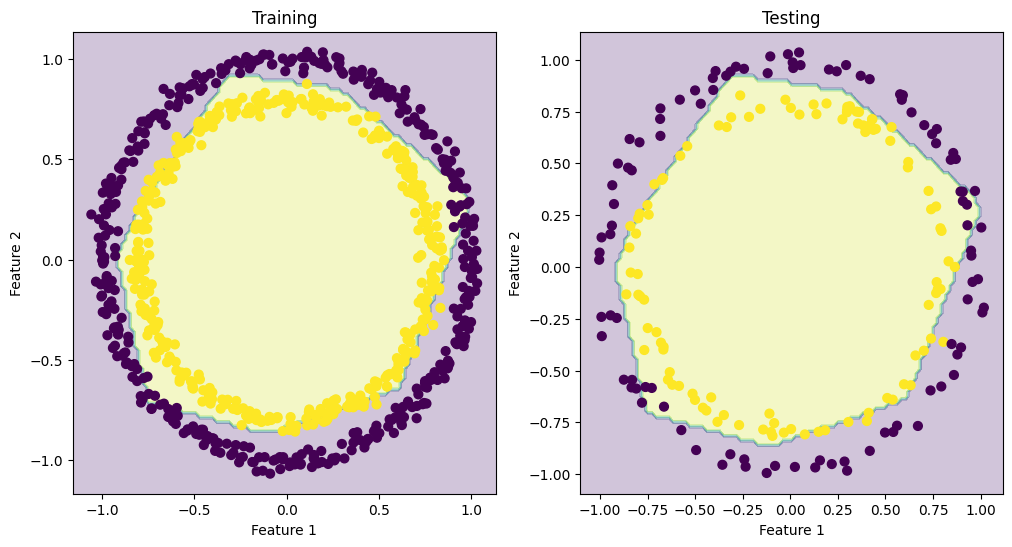

In [168]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model_3, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Testing")
plot_decision_boundary(model_3, X_test, y_test)

- The model with the ReLU activation function is by far far better the one with no activation function.

- Now let us compare the visualizations of the linear and non-linear models.

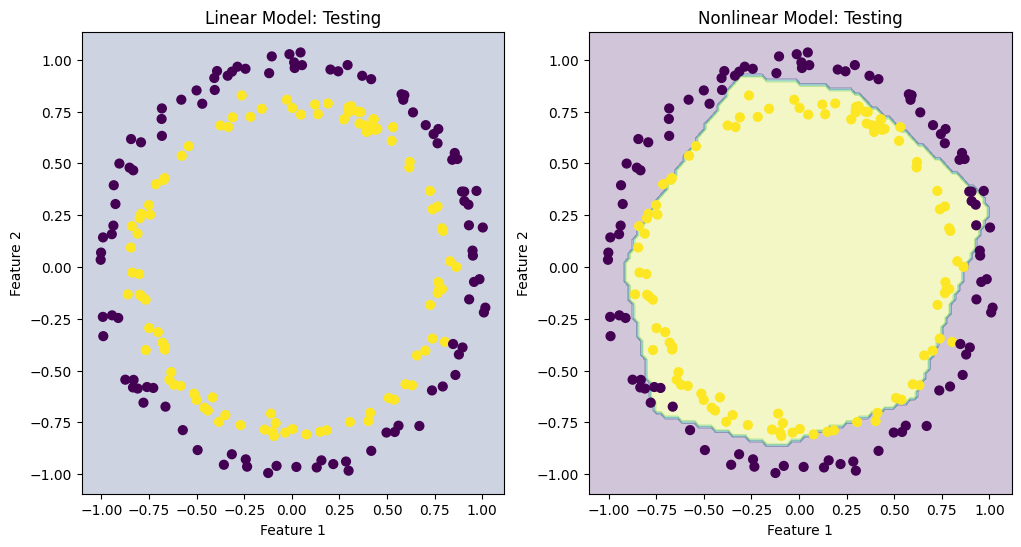

In [169]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Linear Model: Testing")
plot_decision_boundary(model_2, X_test, y_test) # model_1 = no non-linearity

plt.subplot(1, 2, 2)
plt.title("Nonlinear Model: Testing")
plot_decision_boundary(model_3, X_test, y_test)  # model_2 = has non-linearity

- Potentially we could try a few tricks to improve the test accuracy of the model:
    * change **learning rate**
    * increase number of **hidden nodes**
    * add **more layers**
    * **train for longer**
    * change **activation function**
    * change **loss** function


- Add one hidden layer and use hidden nodes of 16 and observe the difference.

- We can also use `torch.nn.sequential()` function to intantiate a model without defining it separately:

In [170]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_4 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 8),
    nn.ReLU(),
    nn.Linear(in_features = 8, out_features = 8),
    nn.ReLU(),
    nn.Linear(in_features = 8, out_features = 1),
    ).to(device)
print(model_4)
# criterion = nn.BCELoss()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_4.parameters(), lr = 0.1)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
)


In [171]:
torchinfo.summary(model_4, input_size = [2])

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1]                       --
├─Linear: 1-1                            [8]                       24
├─ReLU: 1-2                              [8]                       --
├─Linear: 1-3                            [8]                       72
├─ReLU: 1-4                              [8]                       --
├─Linear: 1-5                            [1]                       9
Total params: 105
Trainable params: 105
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [172]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(1, epochs + 1):

  y_logits = model_4(X_train)
  y_pred_probs = torch.sigmoid(y_logits)      # <- turn logits to pred probs
  y_pred = torch.round(y_pred_probs)          # <- turn pred probs to pred labels

  # loss = criterion(y_pred_probs, y_train)   # <- `criterion = nn.BCELoss` -> pred probabilities as inputs
  loss = criterion(y_logits, y_train)         # <- `criterion = nn.BCEWithLogitsLoss` -> pred logits as inputs
  accuracy = accuracy_metric(y_true = y_train, y_pred = y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test)
    test_pred_probs = torch.sigmoid(test_logits)            # <- turn logits to pred probs
    test_pred = torch.round(test_pred_probs)                # <- turn pred probs to pred labels

    # test_loss = criterion(test_pred_probs, y_test)        # <- If `criterion = nn.BCEWithLogitsLoss`
    test_loss = criterion(test_logits, y_test)              # <- If `criterion = nn.BCEWithLogitsLoss`
    test_acc = accuracy_metric(y_true = y_test, y_pred = test_pred)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss (train, test): ({loss:.5f}, {test_loss:.5f})| Accuracy (train, test): ({accuracy:.2f}%, {test_acc:.2f}%).")

Epoch: 100 | Loss (train, test): (0.69044, 0.68768)| Accuracy (train, test): (50.75%, 56.00%).
Epoch: 200 | Loss (train, test): (0.68889, 0.68573)| Accuracy (train, test): (51.62%, 56.00%).
Epoch: 300 | Loss (train, test): (0.68688, 0.68327)| Accuracy (train, test): (52.00%, 55.50%).
Epoch: 400 | Loss (train, test): (0.68405, 0.68005)| Accuracy (train, test): (52.38%, 56.00%).
Epoch: 500 | Loss (train, test): (0.67972, 0.67548)| Accuracy (train, test): (54.00%, 56.50%).
Epoch: 600 | Loss (train, test): (0.67270, 0.66846)| Accuracy (train, test): (60.62%, 60.50%).
Epoch: 700 | Loss (train, test): (0.66106, 0.65799)| Accuracy (train, test): (72.00%, 74.00%).
Epoch: 800 | Loss (train, test): (0.63983, 0.64112)| Accuracy (train, test): (77.38%, 80.50%).
Epoch: 900 | Loss (train, test): (0.59801, 0.60661)| Accuracy (train, test): (87.88%, 88.00%).
Epoch: 1000 | Loss (train, test): (0.52088, 0.53919)| Accuracy (train, test): (94.00%, 90.50%).


In [173]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_5 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 16),
    nn.ReLU(),
    nn.Linear(in_features = 16, out_features = 16),
    nn.ReLU(),
    nn.Linear(in_features = 16, out_features = 1),
    ).to(device)
print(model_5)
# criterion = nn.BCELoss()
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_5.parameters(), lr = 0.1)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(1, epochs + 1):

  y_logits = model_5(X_train)
  y_pred_probs = torch.sigmoid(y_logits)      # <- turn logits to pred probs
  y_pred = torch.round(y_pred_probs)          # <- turn pred probs to pred labels

  # loss = criterion(y_pred_probs, y_train)   # <- `criterion = nn.BCELoss` -> pred probabilities as inputs
  loss = criterion(y_logits, y_train)         # <- `criterion = nn.BCEWithLogitsLoss` -> pred logits as inputs
  accuracy = accuracy_metric(y_true = y_train, y_pred = y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_5.eval()
  with torch.inference_mode():
    test_logits = model_5(X_test)
    test_pred_probs = torch.sigmoid(test_logits)            # <- turn logits to pred probs
    test_pred = torch.round(test_pred_probs)                # <- turn pred probs to pred labels

    # test_loss = criterion(test_pred_probs, y_test)        # <- If `criterion = nn.BCEWithLogitsLoss`
    test_loss = criterion(test_logits, y_test)              # <- If `criterion = nn.BCEWithLogitsLoss`
    test_acc = accuracy_metric(y_true = y_test, y_pred = test_pred)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss (train, test): ({loss:.5f}, {test_loss:.5f})| Accuracy (train, test): ({accuracy:.2f}%, {test_acc:.2f}%).")


Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
)
Epoch: 100 | Loss (train, test): (0.68990, 0.69142)| Accuracy (train, test): (56.50%, 51.00%).
Epoch: 200 | Loss (train, test): (0.68666, 0.68878)| Accuracy (train, test): (53.00%, 52.00%).
Epoch: 300 | Loss (train, test): (0.68269, 0.68580)| Accuracy (train, test): (53.62%, 52.50%).
Epoch: 400 | Loss (train, test): (0.67741, 0.68193)| Accuracy (train, test): (54.00%, 53.50%).
Epoch: 500 | Loss (train, test): (0.67015, 0.67646)| Accuracy (train, test): (55.75%, 55.50%).
Epoch: 600 | Loss (train, test): (0.65952, 0.66788)| Accuracy (train, test): (62.25%, 58.00%).
Epoch: 700 | Loss (train, test): (0.64190, 0.65344)| Accuracy (train, test): (75.50%, 68.50%).
Epoch: 800 | Loss (train, test): (0.61321, 0.62918)| Accuracy (train, test): (87.38%, 85.50%).
Epoch: 900 | Loss (train, 

- Let us observe the plots of the four models

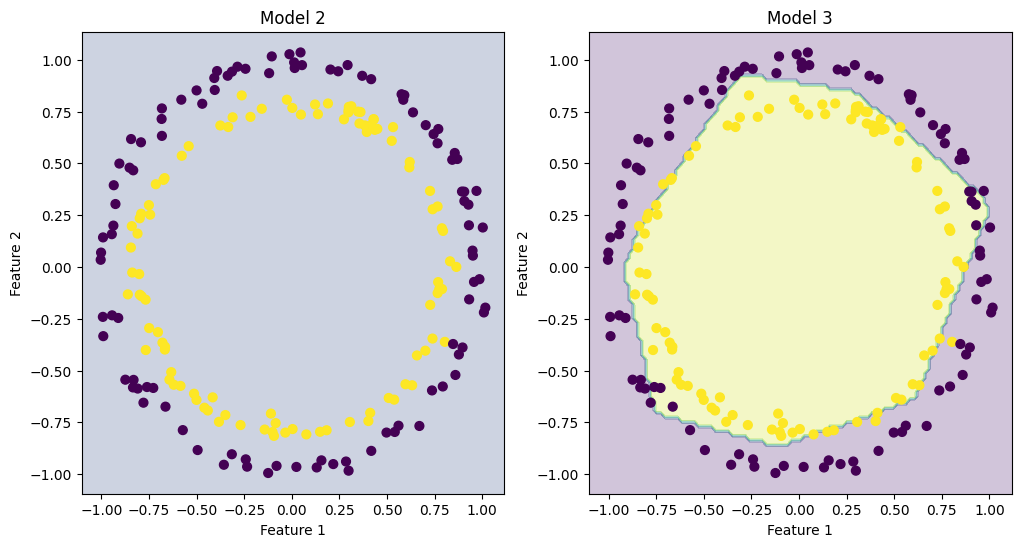

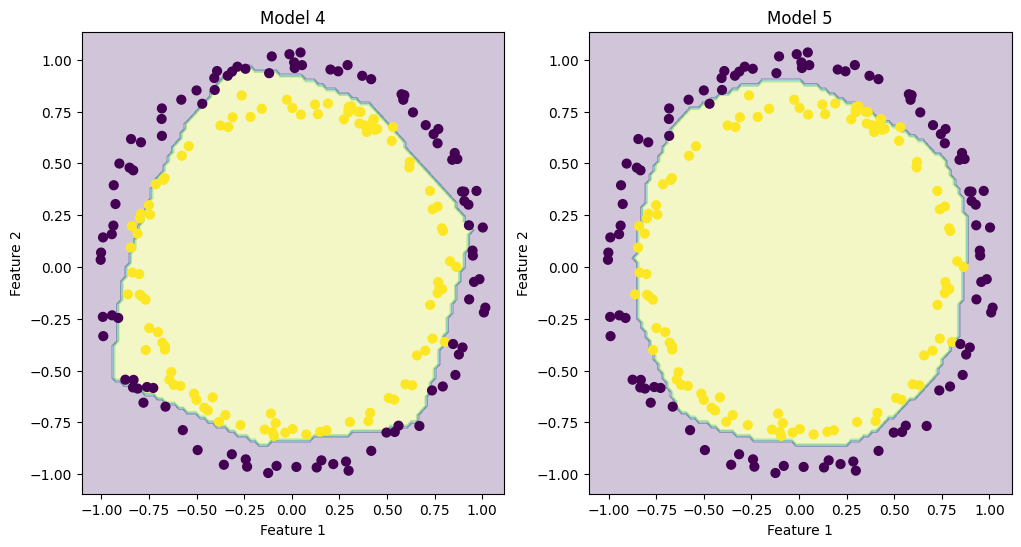

In [174]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Model 2")
plot_decision_boundary(model_2, X_test, y_test)

plt.subplot(1, 2, 2)
plt.title("Model 3")
plot_decision_boundary(model_3, X_test, y_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Model 4")
plot_decision_boundary(model_4, X_test, y_test)

plt.subplot(1, 2, 2)
plt.title("Model 5")
plot_decision_boundary(model_5, X_test, y_test)

# **4. End To End Example**

## **4.1. Load Data and Prepare**

In [175]:
import pandas as pd

url = "https://raw.githubusercontent.com/awolseid/Datasets/main/MDTBPatients.csv"

death_df = pd.read_csv(url)
death_df

,ID,Sex,Age,BMI,EducLevel,Mar_Stat,Residence,TB_History,Complication,Comorbidity,Smoking,Alcohol,HIV,Received_ART,Death
0,458,Female,58,21.529091,Grade 1-8,Married,Urban,Yes,No,No,No,No,Negative,No,Live
1,3,Female,22,30.818541,Grade 8-12,Married,Urban,No,No,No,No,No,Negative,No,Live
2,132,Female,35,14.692378,Grade 8-12,Married,Urban,Yes,No,No,No,No,Negative,No,Live
3,592,Male,43,19.151192,Grade 8-12,Never married,Urban,Yes,No,No,No,No,Negative,No,Live
4,170,Female,47,13.319459,Above grade 12,Married,Rural,Yes,No,No,No,No,Negative,No,Live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,516,Male,57,16.608997,Grade 8-12,Never married,Urban,Yes,Yes,No,Yes,No,Negative,No,Died
622,393,Male,30,11.360219,Grade 1-8,Never married,Urban,Yes,Yes,Yes,No,No,Positive,Yes,Died
623,371,Female,20,12.908315,Above grade 12,Never married,Urban,No,Yes,Yes,No,No,Negative,No,Died
624,510,Male,48,15.959654,Above grade 12,"Other (divorced, widowed)",Urban,No,Yes,Yes,Yes,No,Positive,Yes,Died


In [176]:
death_df.shape

(626, 15)

In [177]:
death_df.isna().sum()

ID              0
Sex             0
Age             0
BMI             0
EducLevel       0
Mar_Stat        0
Residence       0
TB_History      0
Complication    0
Comorbidity     0
Smoking         0
Alcohol         0
HIV             0
Received_ART    0
Death           0
dtype: int64

In [178]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            626 non-null    int64  
 1   Sex           626 non-null    object 
 2   Age           626 non-null    int64  
 3   BMI           626 non-null    float64
 4   EducLevel     626 non-null    object 
 5   Mar_Stat      626 non-null    object 
 6   Residence     626 non-null    object 
 7   TB_History    626 non-null    object 
 8   Complication  626 non-null    object 
 9   Comorbidity   626 non-null    object 
 10  Smoking       626 non-null    object 
 11  Alcohol       626 non-null    object 
 12  HIV           626 non-null    object 
 13  Received_ART  626 non-null    object 
 14  Death         626 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 73.5+ KB


In [179]:
death_df.duplicated(subset=['ID']).sum()

0

In [180]:
death_df.nunique()

ID              626
Sex               2
Age              55
BMI             306
EducLevel         3
Mar_Stat          3
Residence         2
TB_History        2
Complication      2
Comorbidity       2
Smoking           2
Alcohol           2
HIV               2
Received_ART      2
Death             2
dtype: int64

In [181]:
death_df.describe()

,ID,Age,BMI
count,626.000000,626.000000,626.000000
mean,319.549521,33.081470,17.731032
std,184.583583,11.671562,3.475346
min,1.000000,15.000000,8.116546
25%,159.500000,25.000000,15.420350
50%,319.500000,30.000000,17.419073
75%,479.750000,40.000000,19.531250
max,638.000000,85.000000,35.055634


In [182]:
categorical_features = death_df.select_dtypes(include="object").columns
print(categorical_features)
numerical_features = death_df.select_dtypes(exclude="object").columns
print(numerical_features)

Index(['Sex', 'EducLevel', 'Mar_Stat', 'Residence', 'TB_History',
       'Complication', 'Comorbidity', 'Smoking', 'Alcohol', 'HIV',
       'Received_ART', 'Death'],
      dtype='object')
Index(['ID', 'Age', 'BMI'], dtype='object')


In [183]:
death_df["ID"] = death_df["ID"].astype(str)

categorical_features = death_df.select_dtypes(include="object").columns
print(categorical_features)
numerical_features = death_df.select_dtypes(exclude="object").columns
print(numerical_features)

Index(['ID', 'Sex', 'EducLevel', 'Mar_Stat', 'Residence', 'TB_History',
       'Complication', 'Comorbidity', 'Smoking', 'Alcohol', 'HIV',
       'Received_ART', 'Death'],
      dtype='object')
Index(['Age', 'BMI'], dtype='object')


In [184]:
death_df['Outcome'] = death_df['Death'].map({'Live': 0, 'Died': 1})
death_df

,ID,Sex,Age,BMI,EducLevel,Mar_Stat,Residence,TB_History,Complication,Comorbidity,Smoking,Alcohol,HIV,Received_ART,Death,Outcome
0,458,Female,58,21.529091,Grade 1-8,Married,Urban,Yes,No,No,No,No,Negative,No,Live,0
1,3,Female,22,30.818541,Grade 8-12,Married,Urban,No,No,No,No,No,Negative,No,Live,0
2,132,Female,35,14.692378,Grade 8-12,Married,Urban,Yes,No,No,No,No,Negative,No,Live,0
3,592,Male,43,19.151192,Grade 8-12,Never married,Urban,Yes,No,No,No,No,Negative,No,Live,0
4,170,Female,47,13.319459,Above grade 12,Married,Rural,Yes,No,No,No,No,Negative,No,Live,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,516,Male,57,16.608997,Grade 8-12,Never married,Urban,Yes,Yes,No,Yes,No,Negative,No,Died,1
622,393,Male,30,11.360219,Grade 1-8,Never married,Urban,Yes,Yes,Yes,No,No,Positive,Yes,Died,1
623,371,Female,20,12.908315,Above grade 12,Never married,Urban,No,Yes,Yes,No,No,Negative,No,Died,1
624,510,Male,48,15.959654,Above grade 12,"Other (divorced, widowed)",Urban,No,Yes,Yes,Yes,No,Positive,Yes,Died,1


In [185]:
tb_death_df = death_df.drop(columns=["ID", "Death"])
tb_death_df

,Sex,Age,BMI,EducLevel,Mar_Stat,Residence,TB_History,Complication,Comorbidity,Smoking,Alcohol,HIV,Received_ART,Outcome
0,Female,58,21.529091,Grade 1-8,Married,Urban,Yes,No,No,No,No,Negative,No,0
1,Female,22,30.818541,Grade 8-12,Married,Urban,No,No,No,No,No,Negative,No,0
2,Female,35,14.692378,Grade 8-12,Married,Urban,Yes,No,No,No,No,Negative,No,0
3,Male,43,19.151192,Grade 8-12,Never married,Urban,Yes,No,No,No,No,Negative,No,0
4,Female,47,13.319459,Above grade 12,Married,Rural,Yes,No,No,No,No,Negative,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,Male,57,16.608997,Grade 8-12,Never married,Urban,Yes,Yes,No,Yes,No,Negative,No,1
622,Male,30,11.360219,Grade 1-8,Never married,Urban,Yes,Yes,Yes,No,No,Positive,Yes,1
623,Female,20,12.908315,Above grade 12,Never married,Urban,No,Yes,Yes,No,No,Negative,No,1
624,Male,48,15.959654,Above grade 12,"Other (divorced, widowed)",Urban,No,Yes,Yes,Yes,No,Positive,Yes,1


In [186]:
X_df = tb_death_df.drop(columns=["Outcome"])
X_df

,Sex,Age,BMI,EducLevel,Mar_Stat,Residence,TB_History,Complication,Comorbidity,Smoking,Alcohol,HIV,Received_ART
0,Female,58,21.529091,Grade 1-8,Married,Urban,Yes,No,No,No,No,Negative,No
1,Female,22,30.818541,Grade 8-12,Married,Urban,No,No,No,No,No,Negative,No
2,Female,35,14.692378,Grade 8-12,Married,Urban,Yes,No,No,No,No,Negative,No
3,Male,43,19.151192,Grade 8-12,Never married,Urban,Yes,No,No,No,No,Negative,No
4,Female,47,13.319459,Above grade 12,Married,Rural,Yes,No,No,No,No,Negative,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,Male,57,16.608997,Grade 8-12,Never married,Urban,Yes,Yes,No,Yes,No,Negative,No
622,Male,30,11.360219,Grade 1-8,Never married,Urban,Yes,Yes,Yes,No,No,Positive,Yes
623,Female,20,12.908315,Above grade 12,Never married,Urban,No,Yes,Yes,No,No,Negative,No
624,Male,48,15.959654,Above grade 12,"Other (divorced, widowed)",Urban,No,Yes,Yes,Yes,No,Positive,Yes


In [187]:
y_df = tb_death_df[["Outcome"]]
y_df

,Outcome
0,0
1,0
2,0
3,0
4,0
...,...
621,1
622,1
623,1
624,1


## **4.2. Split Data to Train and Test**

Unbalanced data

In [188]:
y_df["Outcome"].value_counts()

Outcome
0    533
1     93
Name: count, dtype: int64

In [189]:
from sklearn.model_selection import train_test_split

X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(
    X_df, y_df, stratify= y_df, test_size=0.2, random_state=42)

In [190]:
y_train_df["Outcome"].value_counts(), y_test_df["Outcome"].value_counts()

(Outcome
 0    426
 1     74
 Name: count, dtype: int64,
 Outcome
 0    107
 1     19
 Name: count, dtype: int64)

## **4.3. Transform Features**

In [191]:
cat_features = X_df.select_dtypes(include="object").columns
print(cat_features)
num_features = X_df.select_dtypes(exclude="object").columns
print(num_features)

Index(['Sex', 'EducLevel', 'Mar_Stat', 'Residence', 'TB_History',
       'Complication', 'Comorbidity', 'Smoking', 'Alcohol', 'HIV',
       'Received_ART'],
      dtype='object')
Index(['Age', 'BMI'], dtype='object')


In [192]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer([
    ("Encoder", OneHotEncoder(), cat_features),
     ("Scaler", StandardScaler(), num_features)]
                                )
transformer

ColumnTransformer(transformers=[('Encoder', OneHotEncoder(),
                                 Index(['Sex', 'EducLevel', 'Mar_Stat', 'Residence', 'TB_History',
       'Complication', 'Comorbidity', 'Smoking', 'Alcohol', 'HIV',
       'Received_ART'],
      dtype='object')),
                                ('Scaler', StandardScaler(),
                                 Index(['Age', 'BMI'], dtype='object'))])

In [193]:
X_train_array = transformer.fit_transform(X_train_df)
X_test_array = transformer.transform(X_test_df)
X_train_array

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.16727495,  0.89082261],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.35113915,  1.39162047],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -1.301565  ,  0.76318948],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.69674855, -0.58099681],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.2536773 ,  0.53681769],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.51288435,  0.49275972]])

In [194]:
y_train_array = y_train_df.values
y_val_array = y_test_df.values
y_test_array = y_test_df.values

## **4.4. Turn Transformed Data To Tensors**

In [195]:
import torch
X_train = torch.tensor(X_train_array, dtype=torch.float32)
X_test = torch.tensor(X_test_array, dtype=torch.float32)

y_train = torch.tensor(y_train_array, dtype=torch.float32)
y_test = torch.tensor(y_test_array, dtype=torch.float32)

In [196]:
X_train.shape, y_train.shape, X_test_array.shape, y_test_array.shape

(torch.Size([500, 26]), torch.Size([500, 1]), (126, 26), (126, 1))

## **4.5. Define Model and Instantiate It**

In [197]:
import torch.nn as nn

class BinaryClassificationModel_1(nn.Module):
  def __init__(self, num_inputs, num_outputs=1):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=num_inputs, out_features=num_outputs)

  def forward(self, x):
    return self.linear_layer(x)

In [198]:
torch.manual_seed(42)
num_inputs = X_train.shape[1]

death_model_1 = BinaryClassificationModel_1(num_inputs=num_inputs)
print(death_model_1)

BinaryClassificationModel_1(
  (linear_layer): Linear(in_features=26, out_features=1, bias=True)
)


In [199]:
rand_vector = torch.randn(num_inputs, 1)
death_model_1(rand_vector.squeeze(dim=1))

tensor([-1.4010], grad_fn=<ViewBackward0>)

In [200]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [201]:
def accuracy_metric(y_true, y_pred):
  # appropriate for balanced classes
  correct_preds = torch.eq(y_true, y_pred).sum().item()
  return (correct_preds / len(y_pred)) * 100

## **4.6 Train Model**

In [202]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
num_inputs = X_train.shape[1]

death_model_1 = BinaryClassificationModel_1(num_inputs).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = death_model_1.parameters(), lr = 0.01)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(1, epochs + 1):

  y_logits = death_model_1(X_train)
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)

  loss = criterion(y_logits, y_train)
  accuracy = accuracy_metric(y_true = y_train, y_pred = y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  death_model_1.eval()
  with torch.inference_mode():
    test_logits = death_model_1(X_test)
    test_pred_probs = torch.sigmoid(test_logits)
    test_pred = torch.round(test_pred_probs)

    test_loss = criterion(test_logits, y_test)
    test_acc = accuracy_metric(y_true = y_test, y_pred = test_pred)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss (train, test): ({loss:.5f}, {test_loss:.5f})| Accuracy (train, test): ({accuracy:.2f}%, {test_acc:.2f}%).")

Epoch: 100 | Loss (train, test): (0.34768, 0.34019)| Accuracy (train, test): (86.00%, 86.51%).
Epoch: 200 | Loss (train, test): (0.29191, 0.28138)| Accuracy (train, test): (87.20%, 86.51%).
Epoch: 300 | Loss (train, test): (0.26242, 0.25004)| Accuracy (train, test): (88.80%, 89.68%).
Epoch: 400 | Loss (train, test): (0.24118, 0.22799)| Accuracy (train, test): (89.00%, 92.86%).
Epoch: 500 | Loss (train, test): (0.22473, 0.21142)| Accuracy (train, test): (90.40%, 94.44%).
Epoch: 600 | Loss (train, test): (0.21159, 0.19855)| Accuracy (train, test): (91.80%, 95.24%).
Epoch: 700 | Loss (train, test): (0.20083, 0.18829)| Accuracy (train, test): (92.80%, 95.24%).
Epoch: 800 | Loss (train, test): (0.19182, 0.17993)| Accuracy (train, test): (93.00%, 95.24%).
Epoch: 900 | Loss (train, test): (0.18416, 0.17297)| Accuracy (train, test): (92.80%, 95.24%).
Epoch: 1000 | Loss (train, test): (0.17754, 0.16710)| Accuracy (train, test): (93.00%, 95.24%).


## **4.7. Test Model and Make Predictions**

In [205]:
with torch.inference_mode():
  pred_logits = death_model_1(X_test[:10])
  pred_probs = torch.sigmoid(pred_logits)
  pred_labels = torch.round(pred_probs)

pred_labels

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.]])

- **New observations**

In [210]:
new_obs = X_df[150:160]
new_obs

,Sex,Age,BMI,EducLevel,Mar_Stat,Residence,TB_History,Complication,Comorbidity,Smoking,Alcohol,HIV,Received_ART
150,Female,20,20.079601,Above grade 12,Never married,Urban,Yes,No,No,No,No,Negative,No
151,Male,50,17.006804,Above grade 12,Married,Urban,No,No,No,No,No,Negative,No
152,Female,28,13.149244,Grade 8-12,Never married,Urban,Yes,No,No,No,No,Negative,No
153,Female,35,18.666666,Grade 1-8,Married,Urban,No,Yes,Yes,No,No,Positive,Yes
154,Female,22,13.154509,Grade 8-12,Never married,Urban,Yes,No,No,No,No,Negative,No
155,Female,29,29.744200,Grade 1-8,Married,Urban,Yes,No,No,Yes,Yes,Negative,No
156,Female,40,13.840831,Grade 8-12,"Other (divorced, widowed)",Urban,Yes,No,Yes,No,No,Positive,Yes
157,Female,24,18.066168,Grade 1-8,Never married,Urban,Yes,No,No,No,No,Negative,No
158,Female,45,18.929152,Grade 1-8,Married,Urban,Yes,No,No,No,No,Negative,No
159,Male,80,17.283951,Grade 1-8,Married,Rural,Yes,No,No,No,No,Negative,No


In [209]:
with torch.inference_mode():
  transformed_new_obs = transformer.transform(new_obs)
  transformed_new_obs = torch.tensor(transformed_new_obs, dtype=torch.float32)
  pred_logits = death_model_1(transformed_new_obs)
  pred_probs = torch.sigmoid(pred_logits)
  pred_labels = torch.round(pred_probs)

pred_labels

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])